# 1. Cargar y explorar el conjunto de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("data/dataset_ventas_soles.csv")
df["ventas_soles"] = pd.to_numeric(df["ventas_soles"], errors="coerce")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientes_dia              4000 non-null   int64  
 1   horas_abierto             4000 non-null   float64
 2   publicidad_soles          4000 non-null   float64
 3   promociones_activas       4000 non-null   int64  
 4   empleados_turno           4000 non-null   int64  
 5   precio_promedio           4000 non-null   float64
 6   visitas_redes             4000 non-null   int64  
 7   productos_vendidos        4000 non-null   int64  
 8   tiempo_espera_min         4000 non-null   float64
 9   ticket_promedio           4000 non-null   float64
 10  dia_semana                4000 non-null   object 
 11  feriado                   4000 non-null   object 
 12  clima                     4000 non-null   object 
 13  zona                      4000 non-null   object 
 14  evento_e

In [3]:
df.head(10)

,clientes_dia,horas_abierto,publicidad_soles,promociones_activas,empleados_turno,precio_promedio,visitas_redes,productos_vendidos,tiempo_espera_min,ticket_promedio,...,feriado,clima,zona,evento_especial,turno,tipo_local,sector,método_pago_predominante,competencia_cerca,ventas_soles
0,122,4.096825,935.878755,4,9,40.141186,568,400,12.226162,114.214809,...,No,Soleado,Residencial,No,Noche,Restaurante,Alimentos,Efectivo,Media,10527.05
1,199,4.072308,866.527827,4,6,46.723270,271,498,6.279561,177.175712,...,No,Nublado,Residencial,No,Noche,Tienda,Otros,Plin,Alta,14156.56
2,112,6.856235,724.295798,3,9,49.547073,126,216,10.908209,165.275646,...,No,Lluvioso,Comercial,Sí,Mañana,Servicio,Tecnología,Yape,Media,7163.48
3,34,11.409553,508.113969,1,3,31.157723,387,182,12.721215,178.716475,...,No,Lluvioso,Comercial,No,Mañana,Tienda,Ropa,Efectivo,Alta,4371.97
4,126,5.829414,544.307445,1,4,9.899673,912,412,14.481799,127.088435,...,No,Lluvioso,Residencial,No,Tarde,Restaurante,Otros,Plin,Baja,9989.83
5,91,9.074910,976.482309,3,6,25.660846,839,145,2.201403,103.032202,...,No,Lluvioso,Residencial,No,Tarde,Restaurante,Ropa,Yape,Media,8403.30
6,40,5.776607,967.481922,1,4,40.442052,895,178,1.117411,97.247541,...,No,Lluvioso,Comercial,No,Noche,Restaurante,Ropa,Tarjeta,Baja,6787.90
7,122,6.573360,254.505593,2,1,6.247640,899,249,8.677950,150.563626,...,No,Lluvioso,Industrial,No,Tarde,Servicio,Alimentos,Tarjeta,Baja,6959.50
8,141,10.784337,820.549338,3,7,7.559935,788,221,4.699373,109.046977,...,No,Soleado,Comercial,No,Tarde,Servicio,Ropa,Plin,Baja,9710.04
9,94,9.830892,237.380533,3,5,8.022100,962,262,7.567425,30.096071,...,No,Lluvioso,Residencial,No,Tarde,Restaurante,Tecnología,Efectivo,Alta,4752.60


# 2. Selección de variables numéricas

In [3]:
numeric_df = df.select_dtypes(include=[np.number])

# 3. Aplicación de la correlación de Pearson

In [4]:
correlation_matrix = numeric_df.corr()
target_correlation = correlation_matrix["ventas_soles"].drop("ventas_soles").sort_values(ascending=False)
print(target_correlation)

productos_vendidos     0.610158
clientes_dia           0.585323
publicidad_soles       0.181876
empleados_turno        0.127314
ticket_promedio        0.109662
horas_abierto          0.030567
promociones_activas    0.026254
precio_promedio       -0.008843
visitas_redes         -0.030908
tiempo_espera_min     -0.102881
Name: ventas_soles, dtype: float64


# 4. Gráfico de correlación de Pearson

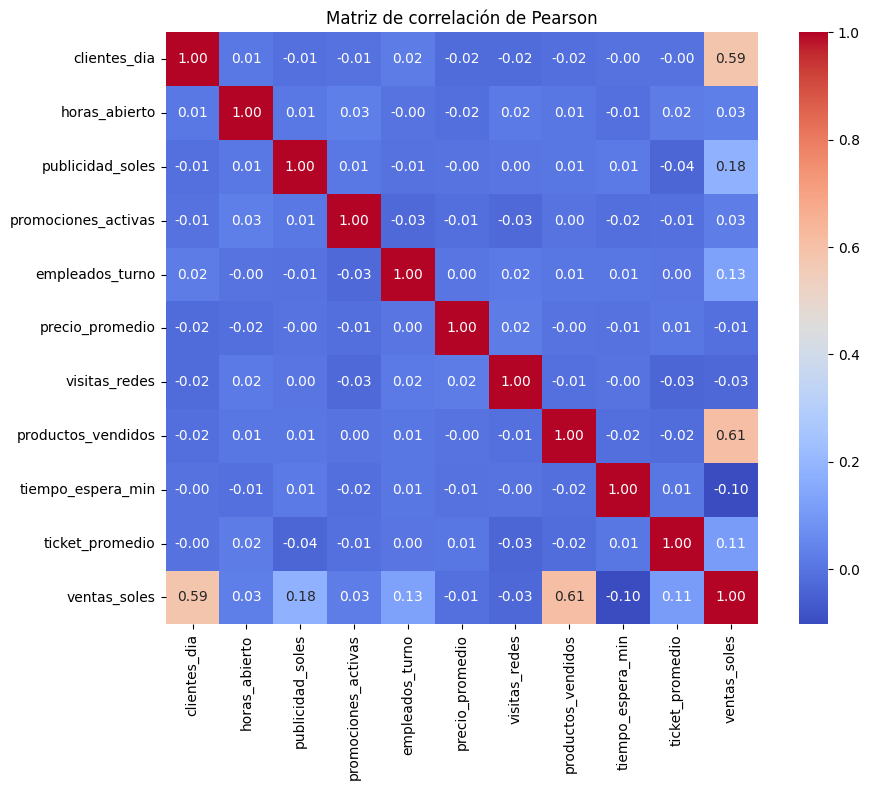

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de correlación de Pearson")
plt.tight_layout()
plt.show()

# 5. Tabla de correlaciones ordenada

In [6]:
correlation_table = target_correlation.reset_index()
correlation_table.columns = ["Variable", "Correlación con ventas_soles"]
print(correlation_table)

              Variable  Correlación con ventas_soles
0   productos_vendidos                      0.610158
1         clientes_dia                      0.585323
2     publicidad_soles                      0.181876
3      empleados_turno                      0.127314
4      ticket_promedio                      0.109662
5        horas_abierto                      0.030567
6  promociones_activas                      0.026254
7      precio_promedio                     -0.008843
8        visitas_redes                     -0.030908
9    tiempo_espera_min                     -0.102881
